In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

### Simple Linear Regression

In [ ]:
dataset=pd.read_csv('/content/Salinan advertising.csv',usecols=['TV','Sales'])
dataset.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,12.0
3,151.5,16.5
4,180.8,17.9


In [ ]:
dataset.shape

(200, 2)

In [ ]:
dataset.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,15.130500
std,85.854236,5.283892
min,0.700000,1.600000
25%,74.375000,11.000000
50%,149.750000,16.000000
75%,218.825000,19.050000
max,296.400000,27.000000


In [ ]:
#menngecek nilai null
dataset.isnull().sum()

,0
TV,0
Sales,0


In [ ]:
#memasukan model linear regression
lr=LinearRegression()

In [ ]:
x=dataset[['TV']]
y=dataset['Sales']

### Train Test Split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=lr.predict(x_test)

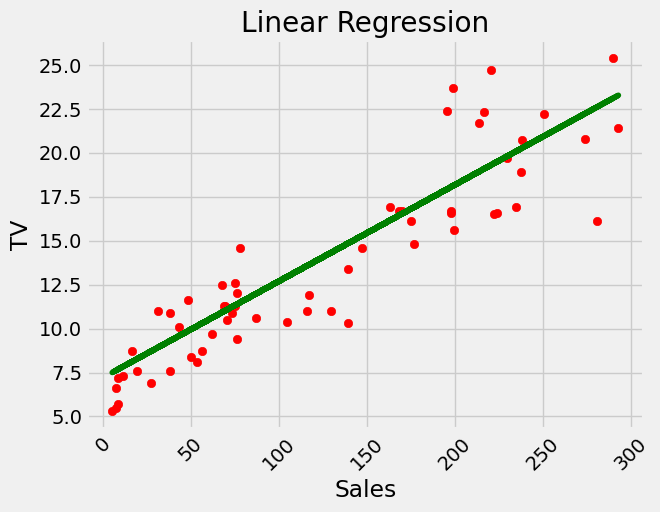

In [ ]:
plt.scatter(x_test,y_test,color='red')
plt.plot(x_test,lr.predict(x_test),color='green')
plt.title('Linear Regression')
plt.xlabel('Sales')
plt.ylabel('TV')
plt.xticks(rotation=45)
plt.show()

### R Squared Score

In [ ]:
print('R2 Score is :', round(r2_score(y_test,y_pred),3)*100, '%')

R2 Score is : 81.5 %


#### *Simple Linear Regression Formula* : **y = b0 + b1 * x1**

model regression linear sebenarnya merupakan rumus linear dalam bentuk y = b0 + b1*x1; dimana y merupakan keluaran atau outcome, dan x1 merupakan variable independen (predictor), juga b1 adalah kemiringan garis; juga dikenal sebagai koefisien regresi dan b0 adalah intersep yang diberi label konstan.

#### Finding Intercept and Coefficient

In [ ]:
lr.intercept_

7.206554548173251

In [ ]:
lr.coef_[0]

0.05483488379527939

In [ ]:
print('predict sales :',round(lr.predict([[300]])[0],2))

predict sales : 23.66


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
y=lr.intercept_ + lr.coef_*300
y

array([23.65701969])

In [ ]:
df_multiple=pd.read_csv('/content/Salinan advertising.csv')
df_multiple.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
df_multiple.shape

(200, 4)

In [ ]:
df_multiple.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


### Missing Value

In [ ]:
df_multiple.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [ ]:
x=df_multiple[['TV','Radio','Newspaper']]
y=df_multiple['Sales']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
lr.fit(x_train,y_train)

LinearRegression()

### Interpretasi Hasil dengan Adjusted R Squared

- Kita sudah tahu bagaimana R Squared dapat membantu kita dalam Evaluasi Model. Namun, ada satu kelemahan utama menggunakan R Squared. Nilai R Squared tidak pernah berkurang. Jika Anda bertanya-tanya mengapa perlu dikurangi karena hanya akan menghasilkan model yang buruk, menambahkan variabel independen baru akan menghasilkan peningkatan nilai R Squared. Ini adalah aliran utama karena R Squared akan menyarankan bahwa menambahkan variabel baru terlepas dari apakah mereka benar-benar signifikan atau tidak, akan meningkatkan nilainya.

In [ ]:
y_pred=lr.predict(x_test)

In [ ]:
r_squared=r2_score(y_test,y_pred)

In [ ]:
adjus=1-(1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1)

In [ ]:
print('Adjusted %', round (adjus*100,2), 'R Squared', round(r_squared*100,2))

Adjusted % 90.45 R Squared 90.59


#### *Rumus Multiple Linear Regression* : **y = b0 + b1 * x1  + b2 * x2  + b3 * x3**

In [ ]:
print('Interest is ', lr.intercept_, 'and coefficient', lr.coef_)

Interest is  4.714126402214127 and coefficient [0.05450927 0.10094536 0.00433665]


In [ ]:
lr.coef_

array([0.05450927, 0.10094536, 0.00433665])

- Koefisien TV : **0.05450927**
- Koefisien Radio : **0.10094536**
- Koefisien Newspaper : **0.00433665**

#### Coba kita cari tahu berapa unit penjualan yang bsa kita peroleh dari pengeluaran dibawah ini
- 200 Dollars untuk Periklanan TV
- 50  Dollars untuk Radio
- 20  Dollars untuk Newspaper

In [ ]:
round(lr.predict([[200,50,20]])[0],2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


20.75

In [ ]:
y = lr.intercept_ + lr.coef_[0] * 200 + lr.coef_[1] * 50 + lr.coef_[2] * 20

## Linear Regression from scratch

In [ ]:
# Importing libraries

import numpy as np

import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

# Linear Regression

class LinearRegression() :

	def __init__( self, learning_rate, iterations ) :

		self.learning_rate = learning_rate

		self.iterations = iterations

	# Function for model training

	def fit( self, X, Y ) :

		# no_of_training_examples, no_of_features

		self.m, self.n = X.shape

		# weight initialization

		self.W = np.zeros( self.n )

		self.b = 0

		self.X = X

		self.Y = Y


		# gradient descent learning

		for i in range( self.iterations ) :

			self.update_weights()

		return self

	# Helper function to update weights in gradient descent

	def update_weights( self ) :

		Y_pred = self.predict( self.X )

		# calculate gradients

		dW = - ( 2 * ( self.X.T ).dot( self.Y - Y_pred ) ) / self.m

		db = - 2 * np.sum( self.Y - Y_pred ) / self.m

		# update weights

		self.W = self.W - self.learning_rate * dW

		self.b = self.b - self.learning_rate * db

		return self

	# Hypothetical function h( x )

	def predict( self, X ) :

		return X.dot( self.W ) + self.b